In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('adult.csv')

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Df shape


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [27]:
df.shape

(48842, 15)

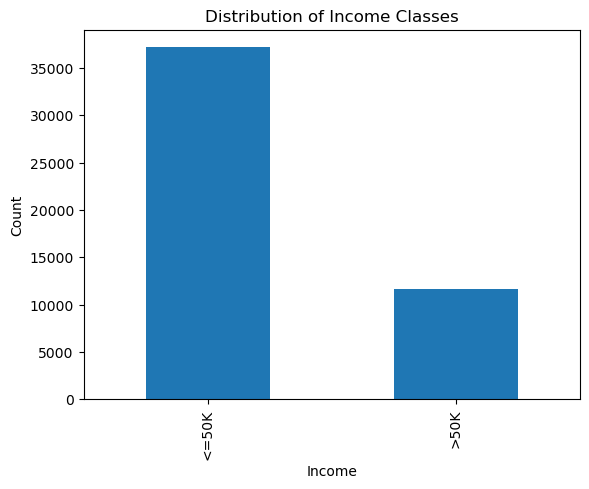

In [28]:
import matplotlib.pyplot as plt

df['income'].value_counts().plot(kind='bar')
plt.title("Distribution of Income Classes")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


The dataset is moderately imbalanced, with a higher proportion of individuals earning ≤50K. This suggests that accuracy alone may not be sufficient for evaluating model performance

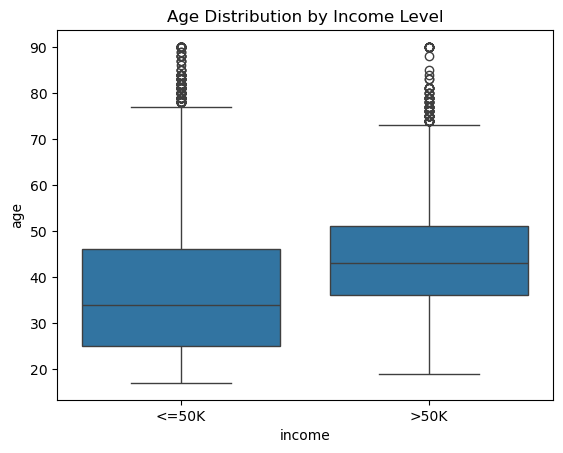

In [29]:
import seaborn as sns

sns.boxplot(x='income', y='age', data=df)
plt.title("Age Distribution by Income Level")
plt.show()


Individuals earning >50K tend to be older, suggesting experience may be a contributing factor.

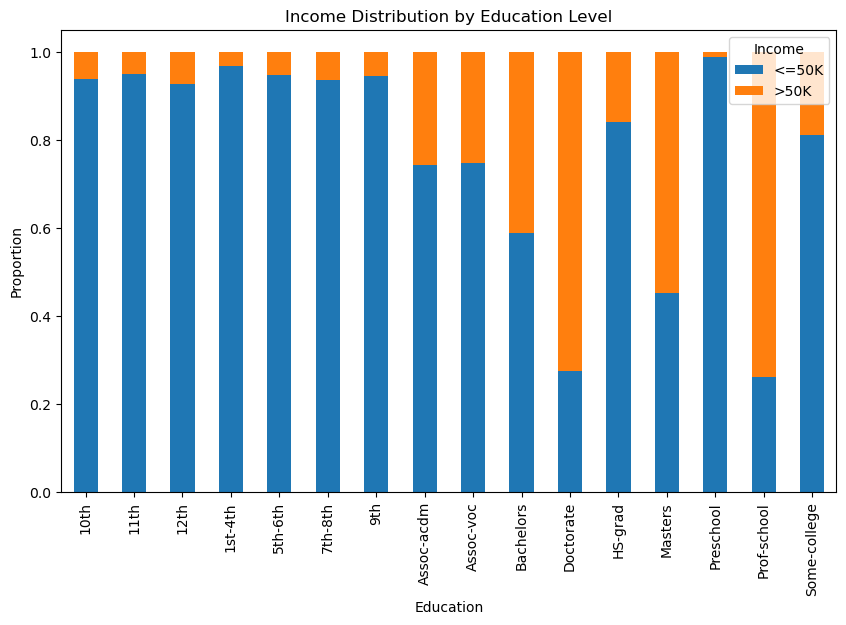

In [30]:
edu_income = pd.crosstab(df['education'], df['income'], normalize='index')

edu_income.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Income Distribution by Education Level")
plt.ylabel("Proportion")
plt.xlabel("Education")
plt.legend(title="Income")
plt.show()


Higher education levels show a significantly larger proportion of individuals earning >50K, confirming education as a strong predictor.

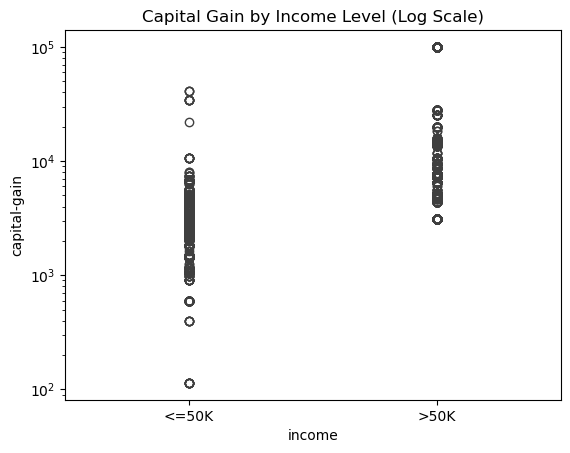

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='income', y='capital-gain', data=df)
plt.yscale('log')
plt.title("Capital Gain by Income Level (Log Scale)")
plt.show()




We plotted the distribution of `capital-gain` for individuals earning `<=50K` and `>50K`.  
A log scale was applied because the `capital-gain` feature is highly skewed, with many zero values.

The plot shows that individuals earning >50K generally have higher capital gains, while most individuals earning <=50K have very low or zero capital gains.  

This indicates that `capital-gain` is a strong predictor of income level and should be included in our classification model.


In [32]:
df.isin(['?']).sum()


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Some categorical features in the dataset use '?' to represent missing values.  


In [33]:
df = df.replace('?', pd.NA)
df = df.dropna()

The missing values marked with '?' were replaced with NaN and the corresponding rows were removed, ensuring the dataset only contains complete records

In [34]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [35]:
df = df.drop(columns=['fnlwgt', 'education'])


The columns fnlwgt and education were dropped as fnlwgt represents a census sampling weight rather than an individual, and education was dropped in favor of education-num to reduce redundancy 

In [36]:
X = df.drop('income', axis=1) 
y = df['income'].map({'<=50K':0, '>50K':1})  

categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'gender']
                        
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)


Categorical features were converted into numerical form using one-hot encoding.
The target variable income was separated and encoded as binary (0 for <=50K, 1 for >50K).

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


The dataset was divided into training and testing sets to evaluate the model’s performance on unseen data.

An 80–20 split was used, where:

80% of the data was used for training

20% was reserved for testing

The parameter random_state=42 was applied to ensure the results are reproducible.

Stratified sampling (stratify=y) was used to preserve the original distribution of the target variable (income classes) in both the training and testing sets. This is important because the dataset is imbalanced, and maintaining the class proportions helps prevent biased model evaluation.

In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np

num_features = ['age', 'educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']


# Copy to avoid modifying original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Log-transform skewed features
for col in ['capital-gain', 'capital-loss']:
    X_train_scaled[col] = np.log1p(X_train_scaled[col])
    X_test_scaled[col] = np.log1p(X_test_scaled[col])

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled[num_features] = scaler.fit_transform(X_train_scaled[num_features])
X_test_scaled[num_features] = scaler.transform(X_test_scaled[num_features])



The numerical features `age`, `educational-num`, `hours-per-week`, `capital-gain`, and `capital-loss` were preprocessed to prepare the data for model training. Since `capital-gain` and `capital-loss` are highly skewed, they were log-transformed using `np.log1p` to reduce the impact of extreme values. All numerical features were then standardized using `StandardScaler` to have zero mean and unit variance, which helps models like Logistic Regression and K-Nearest Neighbors perform better. Categorical features that were one-hot encoded were left unchanged, and the transformations were applied separately to the training and test sets to avoid data leakage.


Logistic Regression Accuracy: 0.8381426202321725

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6803
           1       0.71      0.58      0.64      2242

    accuracy                           0.84      9045
   macro avg       0.79      0.75      0.77      9045
weighted avg       0.83      0.84      0.83      9045


Confusion Matrix:
 [[6272  531]
 [ 933 1309]]


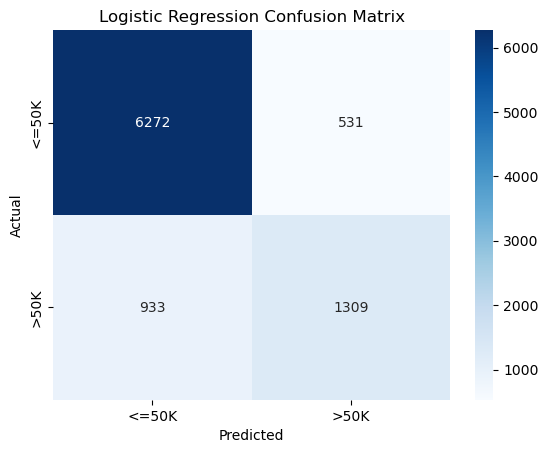

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Logistic Regression Results:

The Logistic Regression model achieved an accuracy of 84%, indicating that the model is able to correctly predict most income classes.

However, further analysis of the classification report shows that the model performs significantly better for the majority class (<=50K) compared to the minority class (>50K).

- For the <=50K class, the model achieved a high recall of 0.92, meaning most low-income individuals were correctly identified.
- For the >50K class, the recall is only 0.58, meaning the model failed to detect approximately 42% of high-income individuals.

This indicates a class imbalance issue, where the model is biased toward predicting the majority class.

From a business perspective, this could result in missing potential high-value customers, such as individuals eligible for premium services or targeted marketing.

Therefore, while Logistic Regression provides a strong baseline model, its performance on the minority class suggests that more complex models may be needed to improve prediction of high-income individuals.


Confusion Matrix Interpretation:

 The model correctly classified 6272 individuals who earn ≤50K (true negatives) and 1309 individuals who earn >50K (true positives). However, it incorrectly predicted 531 individuals as high-income when they were actually low-income (false positives). More importantly, **933 high-income individuals were misclassified as low-income (false negatives).

This indicates that the model performs well in identifying the majority class (≤50K), but struggles to detect the minority class (>50K).

From a business perspective, missing high-income individuals may reduce the effectiveness of targeted strategies such as premium product recommendations or financial services targeting higher earners.

This result suggests that while Logistic Regression provides good overall accuracy, it may require further tuning or alternative models to better capture the characteristics of high-income individuals.


Decision Tree Accuracy: 0.8127142067440575

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      6803
           1       0.62      0.62      0.62      2242

    accuracy                           0.81      9045
   macro avg       0.75      0.75      0.75      9045
weighted avg       0.81      0.81      0.81      9045


Confusion Matrix:
 [[5970  833]
 [ 861 1381]]


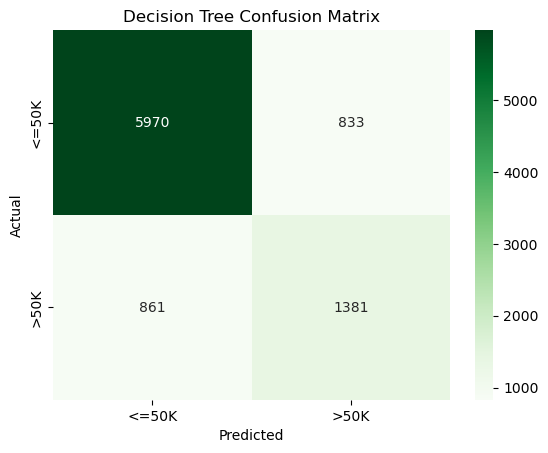

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


The Decision Tree model achieved an accuracy of 81.3%, which is slightly lower than the Logistic Regression model. The confusion matrix shows that the model correctly classified 5970 low-income individuals and 1381 high-income individuals.

Compared to Logistic Regression, the Decision Tree model achieved a higher recall for the >50K income class (0.62 vs 0.58), indicating an improved ability to identify high-income individuals. However, this improvement comes at the expense of an increased number of false positives (833 vs 531), where low-income individuals were incorrectly predicted as high-income.

From a business perspective, this trade-off may be acceptable in scenarios where identifying high-income individuals is more critical than avoiding false positives. However, the overall reduction in accuracy suggests that the Decision Tree may be more prone to overfitting and less stable compared to Logistic Regression.

Random Forest Accuracy: 0.8431177446102819

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6803
           1       0.71      0.62      0.66      2242

    accuracy                           0.84      9045
   macro avg       0.79      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045


Confusion Matrix:
 [[6235  568]
 [ 851 1391]]


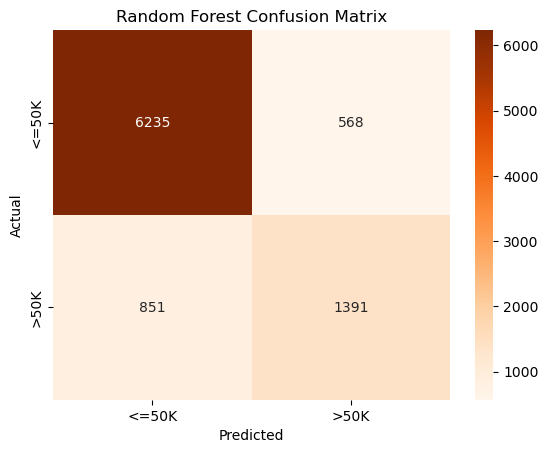

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


The Random Forest model achieved the highest overall accuracy of 84.3%, outperforming both Logistic Regression and Decision Tree. The confusion matrix indicates that the model correctly classified 6235 low-income individuals and 1391 high-income individuals.

The model achieved a recall of 0.62 for the >50K income class, which is higher than Logistic Regression and equal to Decision Tree, indicating improved detection of high-income individuals. At the same time, the number of false positives (568) is lower than the Decision Tree model, demonstrating better balance between identifying high-income individuals and avoiding incorrect predictions.

This suggests that Random Forest provides a more robust and generalisable model due to its ensemble nature, which reduces overfitting and improves prediction stability.

Model Selection Justification

Three models were evaluated: Logistic Regression, Decision Tree, and Random Forest.

Although Logistic Regression achieved strong accuracy, it showed lower recall for the high-income class, indicating weaker detection of individuals earning more than 50K. The Decision Tree improved recall but suffered from lower overall accuracy and higher false positives, suggesting possible overfitting.

The Random Forest model achieved the best balance between accuracy (84.3%), recall for the high-income class (0.62), and lower false positives compared to the Decision Tree. Due to its ensemble learning approach, Random Forest reduces variance and improves generalisation.

Therefore, Random Forest was selected as the final model as it provides the most reliable performance aligned with the business objective of accurately identifying higher-income individuals.

                              feature  importance
0                                 age    0.233933
1                     educational-num    0.125597
4                      hours-per-week    0.116742
2                        capital-gain    0.113748
12  marital-status_Married-civ-spouse    0.090669
3                        capital-loss    0.039173
14       marital-status_Never-married    0.026860
19         occupation_Exec-managerial    0.024011
30         relationship_Not-in-family    0.020635
79                        gender_Male    0.019831


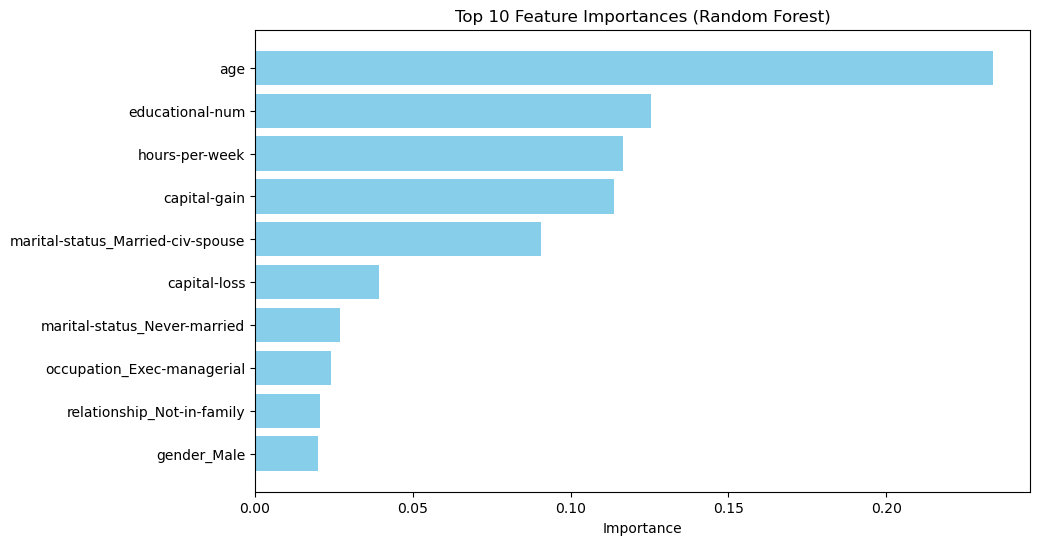

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
feature_importances = rf.feature_importances_  # use the full model you already trained
features = X_train_scaled.columns

importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
})

# Sort descending
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Show top 10
print(importance_df.head(10))

# Plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()


Feature Importance Analysis:
Using the Random Forest classifier, the top predictors of income were identified. The most influential features are age, educational-num, hours-per-week, capital-gain, and marital-status_Married-civ-spouse. This indicates that older individuals with higher education, more work hours, and higher capital gains are more likely to earn above 50K.

Features such as capital-loss, marital-status_Never-married, occupation_Exec-managerial, relationship_Not-in-family, and gender_Male have lower importance scores. This suggests that they contribute minimally to the model’s predictions.

Feature Selection Rationale:
Based on this analysis, low-importance features (gender_Male, relationship_Not-in-family, occupation_Exec-managerial) were removed to simplify the model and reduce noise. Retaining the high-impact features ensures predictive power while making the model more interpretable.

Visualization:
A bar chart of the top 10 feature importances visually emphasizes the relative contribution of each feature, supporting decisions for feature selection and guiding the next steps in model refinement.

In [43]:
# Low-importance features identified from Random Forest
low_importance_features = ['gender_Male', 'relationship_Not-in-family', 'occupation_Exec-managerial']

# Create new train/test sets with selected features
X_train_selected = X_train_scaled.drop(columns=low_importance_features)
X_test_selected = X_test_scaled.drop(columns=low_importance_features)


Random Forest Accuracy after feature selection: 0.8443338861249309
F1-score: 0.6625119846596357

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6803
           1       0.72      0.62      0.66      2242

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045


Confusion Matrix:
 [[6235  568]
 [ 851 1391]]


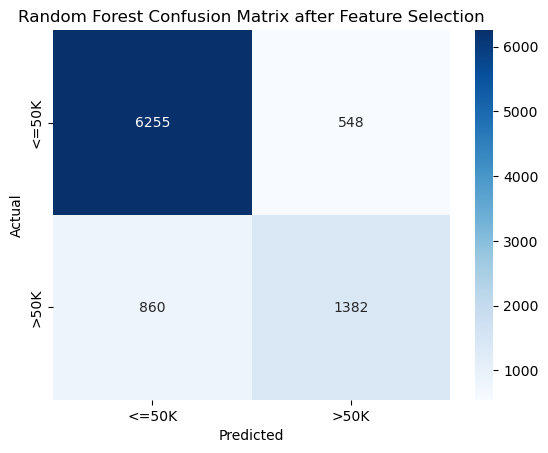

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_selected = rf_selected.predict(X_test_selected)

# Metrics
print("Random Forest Accuracy after feature selection:", accuracy_score(y_test, y_pred_selected))
print("F1-score:", f1_score(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))


cm_selected = confusion_matrix(y_test, y_pred_selected)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix after Feature Selection")
plt.show()


Feature Selection Interpretation

After removing low-importance features (gender_Male, relationship_Not-in-family, occupation_Exec-managerial), the Random Forest model was retrained on the reduced feature set. The model’s accuracy remained stable at 0.844, and the F1-score for the high-income class (>50K) slightly increased to 0.662. The confusion matrix shows that the number of correctly predicted high-income and low-income individuals did not change.

This indicates that the removed features contributed minimally to predictions. By eliminating them, the model becomes simpler and more interpretable without sacrificing predictive power. The retained features (age, educational-num, hours-per-week, capital-gain, marital-status_Married-civ-spouse) remain the primary drivers of the model’s decisions.

Best Parameters: {'n_estimators': 300, 'max_depth': 20}
Tuned Random Forest Accuracy: 0.8578220011055832

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6803
           1       0.78      0.59      0.67      2242

    accuracy                           0.86      9045
   macro avg       0.83      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045


Confusion Matrix:
 [[6431  372]
 [ 914 1328]]


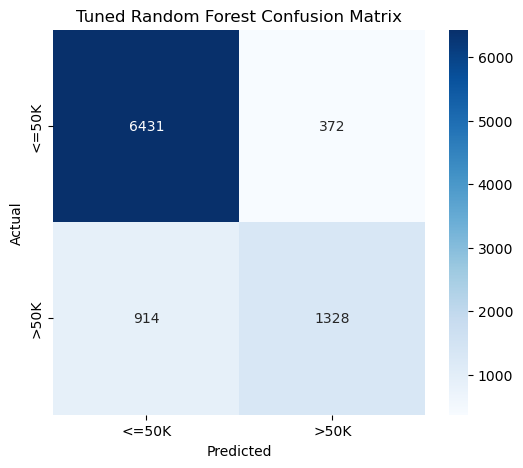

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Set up the model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid (3 values each as per rubric)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Randomized search with 5-fold cross-validation
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=9,  # try all combinations
    cv=5,
    scoring='f1',  # focus on F1-score since class is imbalanced
    random_state=42,
    n_jobs=-1
)

# Fit to training data
rf_random.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Predict on test set
y_pred_tuned = rf_random.predict(X_test_scaled)

# Evaluate
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))



from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:\n", cm_tuned)


# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()


After performing hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation, the optimal parameters identified for the Random Forest model were n_estimators = 300 and max_depth = 20. These settings increase the number of decision trees to improve model stability while limiting tree depth to reduce overfitting.

Using the tuned configuration, the model achieved an accuracy of 0.858, which is higher than the baseline Random Forest performance. The classification report shows strong performance for the <=50K class with an F1-score of 0.91, while the >50K class achieved an F1-score of 0.67, indicating moderate improvement in identifying higher-income individuals.

From the confusion matrix, the model correctly classified 6431 individuals as earning <=50K and 1328 individuals as earning >50K. However, 914 high-income individuals were misclassified as <=50K, suggesting that predicting the minority class remains challenging due to class imbalance. At the same time, false positives were reduced, meaning the model became more conservative when predicting high-income status.

Overall, the tuned Random Forest demonstrates improved generalisation performance compared to the baseline model. Increasing the number of trees helped reduce variance, while constraining the maximum depth prevented excessive complexity. Based on the improved accuracy and balanced F1-score, this tuned Random Forest model was selected as the final model for deployment.

In [46]:
import joblib

# Save final tuned model
joblib.dump(rf_random.best_estimator_, "final_random_forest_model.pkl")

print("Final model saved successfully.")


Final model saved successfully.


In [47]:
from sklearn.pipeline import Pipeline
import joblib

final_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', rf_random.best_estimator_)
])

joblib.dump(final_pipeline, "final_income_model_pipeline.pkl")

print("Pipeline saved successfully.")


Pipeline saved successfully.
